In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [6]:
#write a function to open a json file and return a dataframe
def read_json(path, env, algo, seed):
    with open(path + "metrics.json", "r") as f:
        data = json.load(f)

    data = data[env][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    
    return df


In [36]:

root = "../results/experiments/"
env = "SpaceInvaders-MinAtar"
data_1 = read_json(root + "env1/", env, "PPO", "seed_42")
data_2 = read_json(root + "env4/", env, "PPO", "seed_42")
data_8 = read_json(root + "env8/", env, "PPO", "seed_42")
data_16 = read_json(root + "env16/", env, "PPO", "seed_42")
data_32 = read_json(root + "env32/", env, "PPO", "seed_42")
data_64 = read_json(root + "env64/", env, "PPO", "seed_42")
data_128 = read_json(root + "env128/", env, "PPO", "seed_42")
data_256 = read_json(root + "env256/", env, "PPO", "seed_42")

# print(data_2.head())


<Axes: >

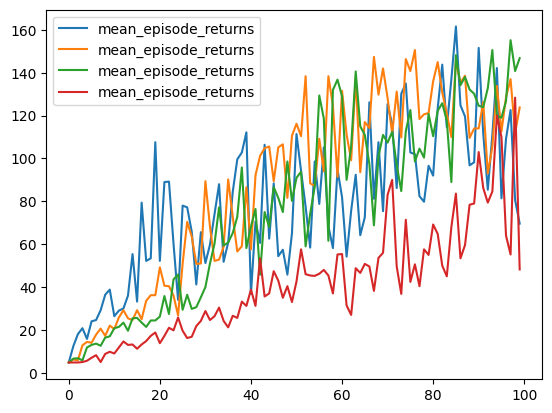

In [22]:
ax = data_2.plot()
data_32.plot(ax=ax)
data_64.plot(ax=ax)
data_128.plot(ax=ax)
# data_256.plot(ax=ax)

Text(0, 0.5, 'Mean episode return')

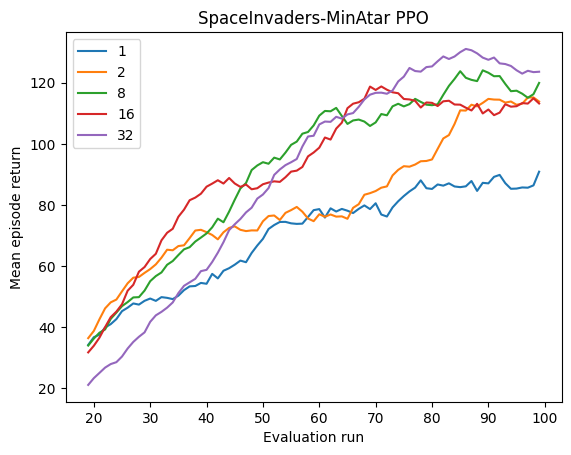

In [38]:
rolling_period = 20

data_1['rolling_mean'] = data_1['mean_episode_returns'].rolling(rolling_period).mean()
data_2['rolling_mean'] = data_2['mean_episode_returns'].rolling(rolling_period).mean()
data_8['rolling_mean'] = data_8['mean_episode_returns'].rolling(rolling_period).mean()
data_16['rolling_mean'] = data_16['mean_episode_returns'].rolling(rolling_period).mean()
data_32['rolling_mean'] = data_32['mean_episode_returns'].rolling(rolling_period).mean()
data_64['rolling_mean'] = data_64['mean_episode_returns'].rolling(rolling_period).mean()
data_128['rolling_mean'] = data_128['mean_episode_returns'].rolling(rolling_period).mean()
data_256['rolling_mean'] = data_256['mean_episode_returns'].rolling(rolling_period).mean()

ax = data_1.plot(y='rolling_mean')
data_2.plot(y='rolling_mean', ax=ax)
data_8.plot(y='rolling_mean', ax=ax)
data_16.plot(y='rolling_mean', ax=ax)
data_32.plot(y='rolling_mean', ax=ax)
# data_64.plot(y='rolling_mean', ax=ax)
# data_128.plot(y='rolling_mean', ax=ax)

ax.legend(["1", "2", "8", "16", "32", "64", "128", "256"])
plt.title("SpaceInvaders-MinAtar PPO")
plt.xlabel("Evaluation run")
# plt.xlabel("Number of parallel environments")
plt.ylabel("Mean episode return")